In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r'C:\Users\HP\Documents\Stock Market prediction(Minor)\stock_market_minor_project.xlsx')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [4]:
data.shape

(1009, 7)

In [5]:
data.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [6]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


In [8]:
df1=data.reset_index()['Close']
df1.shape

(1009,)

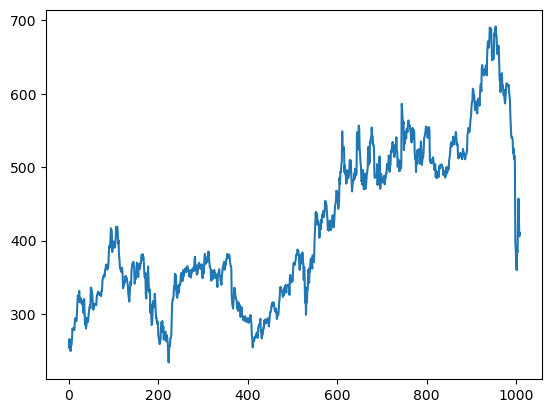

In [9]:
plt.plot(df1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape

(1009, 1)

In [12]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size, test_size

(655, 354)

In [14]:
#convert an array of values into dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train)

[[0.04451626 0.06954849 0.06701469 ... 0.32895744 0.36152555 0.34186674]
 [0.06954849 0.06701469 0.03542955 ... 0.36152555 0.34186674 0.35285382]
 [0.06701469 0.03542955 0.03405342 ... 0.34186674 0.35285382 0.34413837]
 ...
 [0.4212883  0.44841749 0.41300974 ... 0.70481201 0.69670829 0.63753522]
 [0.44841749 0.41300974 0.44474779 ... 0.69670829 0.63753522 0.61634736]
 [0.41300974 0.44474779 0.4367532  ... 0.63753522 0.61634736 0.59662302]]


In [17]:
print(X_test.shape), print(ytest.shape)

(253, 100)
(253,)


(None, None)

In [18]:
print(X_train.shape), print(y_train.shape)

(554, 100)
(554,)


(None, None)

In [19]:
#reshape input to be which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
#Creating stacked LSTM model
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [28]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 478ms/step - loss: 0.0581 - val_loss: 0.0173
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - loss: 0.0078 - val_loss: 0.0496
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - loss: 0.0061 - val_loss: 0.0132
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - loss: 0.0041 - val_loss: 0.0089
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - loss: 0.0034 - val_loss: 0.0073
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - loss: 0.0030 - val_loss: 0.0164
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - loss: 0.0029 - val_loss: 0.0106
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 0.0029 - val_loss: 0.0074
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - loss: 0.0022 - val_loss: 0.0091
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - loss: 0.0027 - val_loss: 0.0072
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 0.0025 - val_loss: 0.0084
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - loss: 0.

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 70/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 71/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - loss: 9.9482e-04 - val_loss: 0.0018
Epoch 72/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - loss: 9.7111e-04 - val_loss: 0.0017
Epoch 73/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - loss: 0.0010 - val_loss: 0.0035
Epoch 74/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step - loss: 9.9480e-04 - val_loss: 0.0019
Epoch 75/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - loss: 9.7271e-04 - val_loss: 0.0018
Epoch 76/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 77/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - loss: 8.1317e-04 - val_loss: 0.0016
Epoch 78/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - loss: 8.2189e-04 - val_loss: 0.0015
Epoch 79/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - loss: 8.3798e-04 - val_loss: 0.0014
Epoch 80/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3

In [33]:
#Doing prediction and checking performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [34]:
#Transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

363.2996160043684

In [37]:
#Test data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

555.5487633194853

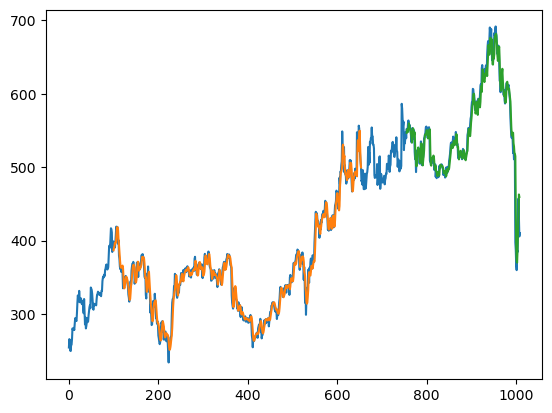

In [38]:
#Plotting

#shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

#shift test prediction for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

#plotting baseline & prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
x_input=test_data[254:].reshape(1,-1)
x_input.shape

(1, 100)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
#demo prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.37456036]
101
1 day input [0.77023219 0.77645742 0.74605183 0.74104981 0.77929713 0.78499816
 0.78309782 0.7836439  0.76444371 0.79766714 0.82230625 0.82844416
 0.8070378  0.87575631 0.88512696 0.8692907  0.87105998 0.85878416
 0.85419716 0.86472556 0.87355013 0.86151455 0.88265868 0.88490858
 0.85463405 0.91583838 0.94122022 0.95624816 0.94938952 0.93715729
 0.9614687  0.99698564 0.97702099 0.96948509 0.99257329 0.94912741
 0.8995871  0.9121033  0.92202003 0.90218643 0.92549314 0.98016641
 0.97300193 0.99062935 1.         0.97887774 0.97184418 0.92903172
 0.91780432 0.92704392 0.94309869 0.93916696 0.89124314 0.83853568
 0.83569596 0.804373   0.82743933 0.85559515 0.86105593 0.82374784
 0.82518942 0.80968086 0.79532991 0.81072929 0.78019265 0.77073453
 0.78604659 0.81046718 0.83082499 0.83049742 0.82837857 0.82311443
 0.82274301 0.8261288  0.80505013 0.79397565 0.78038929 0.72877398
 0.69769113 0.67097703 0.66833397 0.67049655 0.66258921 0.623228
 0.63740416 0.60487972 0.61593233 0

9 day output [[0.38279244]]
10 day input [0.79766714 0.82230625 0.82844416 0.8070378  0.87575631 0.88512696
 0.8692907  0.87105998 0.85878416 0.85419716 0.86472556 0.87355013
 0.86151455 0.88265868 0.88490858 0.85463405 0.91583838 0.94122022
 0.95624816 0.94938952 0.93715729 0.9614687  0.99698564 0.97702099
 0.96948509 0.99257329 0.94912741 0.8995871  0.9121033  0.92202003
 0.90218643 0.92549314 0.98016641 0.97300193 0.99062935 1.
 0.97887774 0.97184418 0.92903172 0.91780432 0.92704392 0.94309869
 0.93916696 0.89124314 0.83853568 0.83569596 0.804373   0.82743933
 0.85559515 0.86105593 0.82374784 0.82518942 0.80968086 0.79532991
 0.81072929 0.78019265 0.77073453 0.78604659 0.81046718 0.83082499
 0.83049742 0.82837857 0.82311443 0.82274301 0.8261288  0.80505013
 0.79397565 0.78038929 0.72877398 0.69769113 0.67097703 0.66833397
 0.67049655 0.66258921 0.623228   0.63740416 0.60487972 0.61593233
 0.59930975 0.35739716 0.33478952 0.28950877 0.27483019 0.33380662
 0.32869527 0.42214021 0.4876

19 day output [[0.380672]]
20 day input [0.86472556 0.87355013 0.86151455 0.88265868 0.88490858 0.85463405
 0.91583838 0.94122022 0.95624816 0.94938952 0.93715729 0.9614687
 0.99698564 0.97702099 0.96948509 0.99257329 0.94912741 0.8995871
 0.9121033  0.92202003 0.90218643 0.92549314 0.98016641 0.97300193
 0.99062935 1.         0.97887774 0.97184418 0.92903172 0.91780432
 0.92704392 0.94309869 0.93916696 0.89124314 0.83853568 0.83569596
 0.804373   0.82743933 0.85559515 0.86105593 0.82374784 0.82518942
 0.80968086 0.79532991 0.81072929 0.78019265 0.77073453 0.78604659
 0.81046718 0.83082499 0.83049742 0.82837857 0.82311443 0.82274301
 0.8261288  0.80505013 0.79397565 0.78038929 0.72877398 0.69769113
 0.67097703 0.66833397 0.67049655 0.66258921 0.623228   0.63740416
 0.60487972 0.61593233 0.59930975 0.35739716 0.33478952 0.28950877
 0.27483019 0.33380662 0.32869527 0.42214021 0.48764772 0.4272515
 0.37509011 0.38507243 0.37456036 0.35583264 0.3482829  0.346075
 0.34803468 0.35329798 0.36

28 day output [[0.38030276]]
29 day input [0.94938952 0.93715729 0.9614687  0.99698564 0.97702099 0.96948509
 0.99257329 0.94912741 0.8995871  0.9121033  0.92202003 0.90218643
 0.92549314 0.98016641 0.97300193 0.99062935 1.         0.97887774
 0.97184418 0.92903172 0.91780432 0.92704392 0.94309869 0.93916696
 0.89124314 0.83853568 0.83569596 0.804373   0.82743933 0.85559515
 0.86105593 0.82374784 0.82518942 0.80968086 0.79532991 0.81072929
 0.78019265 0.77073453 0.78604659 0.81046718 0.83082499 0.83049742
 0.82837857 0.82311443 0.82274301 0.8261288  0.80505013 0.79397565
 0.78038929 0.72877398 0.69769113 0.67097703 0.66833397 0.67049655
 0.66258921 0.623228   0.63740416 0.60487972 0.61593233 0.59930975
 0.35739716 0.33478952 0.28950877 0.27483019 0.33380662 0.32869527
 0.42214021 0.48764772 0.4272515  0.37509011 0.38507243 0.37456036
 0.35583264 0.3482829  0.346075   0.34803468 0.35329798 0.36064634
 0.36875212 0.3764317  0.38279244 0.38729972 0.38978586 0.39040804
 0.3895658  0.387792

In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [49]:
import matplotlib.pyplot as plt
len(df1)

1009

In [50]:
df3=df1.tolist()
df3.extend(lst_output)

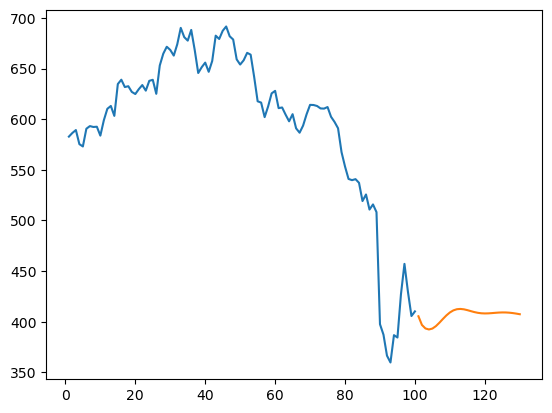

In [55]:
plt.plot(day_new,scaler.inverse_transform(df1[909:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))